In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("heart.csv")

# Analyze Dataset

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


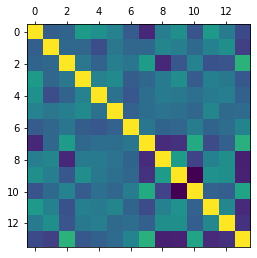

In [11]:
plt.matshow(df.corr())
plt.show()

In [13]:
import seaborn as sns

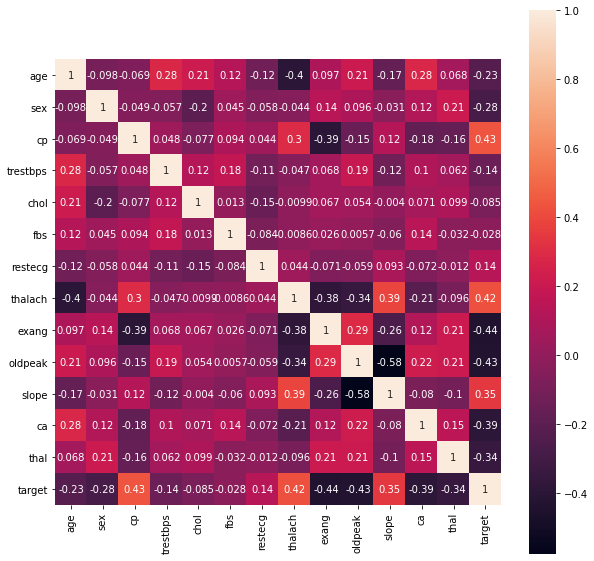

In [73]:
corr = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    cbar = True,annot=True,
    square=True
)


In [16]:

x = df.drop(columns="target",axis=1)
y = df["target"]

In [17]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


# Training Model

In [22]:
model = LogisticRegression()

In [23]:
model.fit(x_train,y_train)

/home/jeet/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

## Accuracy on training data

In [24]:
train_prediction = model.predict(x_train)
train_accuracy = accuracy_score(train_prediction,y_train)
print(train_accuracy)

0.8512396694214877


## Accuracy on test data

In [25]:
test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(test_prediction,y_test)
print(test_accuracy)

0.819672131147541


# Predicting only on specific features

In [57]:
x_new = df[features]

In [58]:
x_new

,slope,thalach,restecg,cp,fbs,age,sex,chol
0,0,150,0,3,1,63,1,233
1,0,187,1,2,0,37,1,250
2,2,172,0,1,0,41,0,204
3,2,178,1,1,0,56,1,236
4,2,163,1,0,0,57,0,354
...,...,...,...,...,...,...,...,...
298,1,123,1,0,0,57,0,241
299,1,132,1,3,0,45,1,264
300,1,141,1,0,1,68,1,193
301,1,115,1,0,0,57,1,131


In [59]:
y_new = df["target"]

In [60]:
y_new

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Again spliting our data

In [61]:
new_x_train,new_x_test,new_y_train,new_y_test = train_test_split(x_new,y_new,test_size=0.2,stratify=y_new,random_state=2)

In [62]:
print(x_new.shape,new_x_train.shape,new_x_test.shape)

(303, 8) (242, 8) (61, 8)


# Training model

In [63]:
model_1 = LogisticRegression()

In [64]:
model_1.fit(new_x_train,new_y_train)

/home/jeet/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Accuracy on train data

In [65]:
new_train_prediction = model_1.predict(new_x_train)
new_train_accuracy = accuracy_score(new_train_prediction,new_y_train)
print(new_train_accuracy)

0.78099173553719


# Accuracy on test data

In [66]:
new_test_prediction = model_1.predict(new_x_test)
new_test_accuracy = accuracy_score(new_test_prediction,new_y_test)
print(new_test_accuracy)

0.7540983606557377


In [67]:
from sklearn import svm

In [68]:
model_2 = svm.SVC(kernel="linear")

In [69]:
model_2.fit(x_train,y_train)

SVC(kernel='linear')

In [70]:
train_prediction = model_2.predict(x_train)
train_accuracy = accuracy_score(train_prediction, y_train)
print(train_accuracy)

0.8553719008264463


In [71]:
test_prediction = model_2.predict(x_test)
test_accuracy = accuracy_score(test_prediction,y_test)
print(test_accuracy)

0.819672131147541
